In [14]:
import numpy as np
import pandas as pd

In [15]:
# load in data set, football manager data plus estimated valuation
df = pd.read_csv('value_df.csv')

In [16]:
#drop unwanted index and any duplicates
df.drop(columns= 'Unnamed: 0', inplace= True)
df.drop_duplicates(inplace= True)

In [17]:
#take top 1000 players
df = df.head(1000)

In [18]:
len(df)

1000

# Scaling

In [19]:
# get column names
df.describe().columns

Index(['age', 'player_id', 'Corners', 'Crossing', 'Dribbling', 'Finishing',
       'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
       'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
       'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Decisions', 'Determination', 'Flair', 'Leadership',
       'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'sum_stats',
       'estimated_value', 'log_value'],
      dtype='object')

In [20]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler

stats = ['Corners', 'Crossing', 'Dribbling',
         'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
         'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
         'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure',
         'Concentration', 'Decisions', 'Determination', 'Flair', 'Leadership',
         'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 'Work Rate',
         'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
         'Natural Fitness', 'Pace', 'Stamina', 'Strength']
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(df[stats])


# Kmeans

In [21]:
# kmeans clustering from scikit-learn
from sklearn.cluster import KMeans
import plotly.graph_objects as go
#consider different numbers of clustering and inertia score
inertia = []
for i in range(5,26):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(df[stats])
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(5,26),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[4,26],title="Cluster Number"),
                  yaxis={'title':'Inertia'})

# Silhouette Score

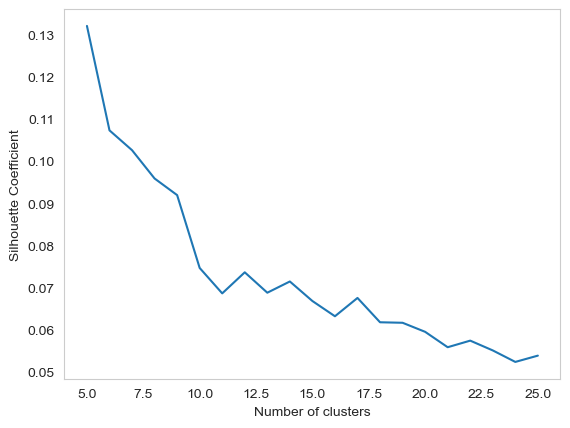

In [22]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#consider silhouette score
k_range = range(5, 26)
scores = []
inertia = []
for k in k_range:
    km3 = KMeans(n_clusters=k, random_state=124)
    km3.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km3.labels_))
    inertia.append(km3.inertia_)

#
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(False)

# Final Kmeans model

In [23]:
#final model with optimized params
km_final = KMeans(n_clusters= 18,random_state= 42)
km_final.fit(X_scaled)


KMeans(n_clusters=18, random_state=42)

In [1]:
#add cluster labels to dataframe
df['cluster'] = km_final.labels_
df.sort_values('cluster')

stats.append('cluster')


NameError: name 'km_final' is not defined

# Results

In [25]:
#plot clusters on radar plot
import plotly.express as px

polar = df[stats].groupby("cluster").mean().reset_index()
polar = pd.melt(polar, id_vars=["cluster"])
fig5 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True, height=800, width=1400)
fig5.show()

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future ve

# t-SNE

In [26]:
# TSNE for clustering visualisation
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# tsne 2 dimensions

# Instantiate the t-SNE model
tsne = TSNE(n_components=2)

# Fit the model to the data
X_embedded = tsne.fit_transform(X_scaled)


C:\Users\joemc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\joemc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [27]:
# add cluster colours
labels = df['cluster']

In [54]:
# Create a dictionary to map cluster labels to colors
label_color_map = {
    0: 'red',    1: 'blue',    2: 'green',    3: 'purple',    4: 'orange',
    5: 'brown',    6: 'pink',    7: 'gray',    8: 'olive',    9: 'cyan',
    10: 'magenta',   11: 'lightblue',    12: 'teal',    13: 'navy',    14: 'lime',
    15: 'yellow',    16: 'darkred',    17: 'gold'
}

colors = [label_color_map[label] for label in labels]

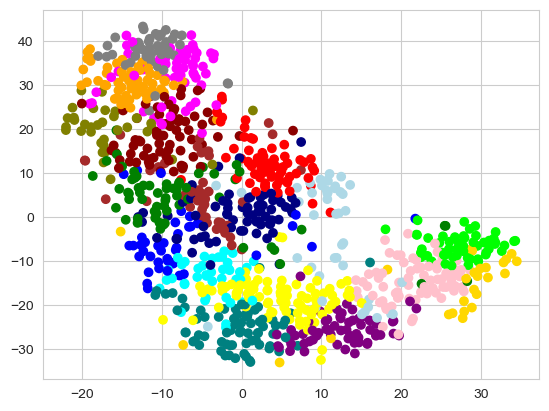

In [55]:
# Create a scatter plot with labeled clusters
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors)
plt.show()

In [30]:
#plot technical,physical, mental stats for given cluster numbers
technical = ['Corners', 'Crossing', 'Dribbling',
             'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
             'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
             'Technique','cluster']
physical = [ 'Work Rate',
             'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
             'Natural Fitness', 'Pace', 'Stamina', 'Strength','cluster']
mental = ['Aggression', 'Anticipation', 'Bravery', 'Composure',
          'Concentration', 'Decisions', 'Determination', 'Flair', 'Leadership',
          'Off the Ball', 'Positioning', 'Teamwork', 'Vision', 'cluster']

striker_clusters = [0,11,13]
df_strikers = df[df['cluster'].isin(striker_clusters)]
#technical radar plot
polar=df_strikers[technical].groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig4.show()

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [31]:
# mental radar plot
polar=df_strikers[mental].groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig6 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig6.show()

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [32]:
# physical radar plot
polar=df_strikers[physical].groupby("cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["cluster"])
fig6 = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=800,width=1400)
fig6.show()

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\joemc\anaconda3\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [33]:

# create a new DataFrame with the t-SNE coordinates
tsne_df = pd.DataFrame(X_embedded, columns=['tsne_1', 'tsne_2'])

In [34]:
# add tsne coordinates to dataframe
df_clusters = pd.concat([df,tsne_df], axis= 1)

In [35]:
# save to csv
df_clusters.to_csv('final.csv')

# Finding 10 closest players based on t-SNE for each player

In [40]:
df_test = df_clusters.copy()

In [41]:
from scipy.spatial.distance import cdist

def find_closest(df):
    df_results = pd.DataFrame()
    for i in range(0,18):
        df_cluster = df_test[df_test['cluster']== i]

        # Create an array of (x, y) coordinates
        coords = df_cluster[['tsne_1', 'tsne_2']].values
        names = df_cluster['name'].tolist()
        # Compute the pairwise distances between all points
        distances = cdist(coords, coords)
        # Set the diagonal to a large value so that each point doesn't count itself as a closest point
        np.fill_diagonal(distances, np.inf)
        # Find the indices of the 10 closest points for each point
        indices = np.argpartition(distances, 10)[:, :10]
        # Get the names of the closest points
        closest_names = np.take(names, indices)
        # Create a new dataframe with the closest names
        closest_names_df = pd.DataFrame(closest_names, columns=[f'closest_{i}' for i in range(10)])
        # Add the index column from the original dataframe to the new dataframe
        closest_names_df['index_tracker'] = df_cluster.index

        df_results = pd.concat([df_results,closest_names_df])

    return df_results

In [42]:
#run function and merge to original dataframe
df_results = find_closest(df_test)

In [44]:
merged_df = df_test.merge(df_results,how= 'left', left_on= df_test.index, right_on='index_tracker')

In [46]:
# save dataframe with most similar players
merged_df.to_csv('clostest_10_all.csv')